# User Car Price Modeling

## Exercise Overview and Context

In this notebook, we are inspecting, analyzing, and modeling the price of used cars. Through this exercise, we will understand the important factors that determine the price of a used car and how we can apply these learnings to make an overall impact to the business. In the notebook below, I am following the CRISP-DM methodology with sections clearly outlined. This is also supplemented by a README doc which includes setup, a summarized report, and final take-aways. 

**References**
- [Assignment Page](https://classroom.emeritus.org/courses/3424/assignments/171432?module_item_id=1170720)
- [CRISP-DM Review](https://www.datascience-pm.com/crisp-dm-2/)


**TODO**
- Outlier Removal - Quartile Rank? 
- one-hot encoding on categorical values
- remove vin
- feature description


## Business Understanding

The Business Understanding phase has four sections: 
1. Determine Business Objectives
2. Assess Situation
3. Determine Data Mining Goals
4. Produce Project Plan

Each of these sections are outlined in cells below:

**Business Objectives:**
- To provide recommendations on what customers to focus for the purpose of marketing
- to provide recommendations on what features to focus on for the purpose improving sales

**Current Situation**
- Available data is a dataset includes 426K rows with relevant information
- Timeline is approximately 1 week to complete assessment and report
- Overall this is a low-risk exercise. A failure to complete this assessment will have little impact to the company. However, a successful assessment will have a positive impact to future sales and growth.


**Data Mining (or Technical) Goals**
- To predict the price of a used car
- To understand the features that affect the price of a used car
- To obtain the best model for predicting the price of a used car
- To obtain a relatively accurate model for predicting the price of a used car

**Project Plan**
1. [Day 1] Obtain Data and Conduct Exploratory Data Analysis
2. [Day 1] Preprocess and Clean Data
3. [Day 1] Build and Train Model
4. [Day 2] Evaluate Model and Potentially Adjust Model as needed
5. [Day 2] Prepare Results and Report
6. [Day 3] Report to Stakeholders and Business Owners
7. [Day 4+] Enact recommendations from exercise

## Data Understanding

In understanding the data, there are four main goals:
1. Collect data
2. Describe data
3. Explore data
4. Verify data quality

The cells below address each one of these areas starting with library imports

### Import libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import scipy as sp


### Collect Data

In [2]:
df = pd.read_csv('./data/vehicles.csv')

### Describe data

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
# Print number of unique values for object type columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].nunique()}')

region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51


#### Feature Description
|  Name | Description |
| ------------ | ----------- |
| id | Id or index of the dataset|
| region | Region where transaction occurred (typically a city or metropolitan statistical area) |
| price | Pirce of the used car when the transaction took place |
| year | Year car was manufactured |
| manufacturer | Manufacturer of the car |

**model**


**condition**


**cylinders**


**fuel**


**odometer**


**title_status**


**transmission**


**VIN**


**drive**


**size**


**type**


**paint_color**


**state**




### Explore Data

In [21]:
# Below are helper functions for plotting categorical variables in seaborn

def plot_categorical_vs_price(df, col, target, figsize=(12,10), raw_bool=True, display=False):
    """
    Creates a bar plot for a categorical variable and a target variable

    Args:
        df (pd.DataFrame): Pandas DataFrame
        col (str): Column name of categorical variable
        target (str): Column name of target variable
        figsize (tuple, optional): Figure size. Defaults to (12,10).
        raw_bool (bool, optional): If True, saves figure as raw data. Defaults to True.
        display (bool, optional): If True, displays plot. Defaults to False.
    
    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=figsize)
    if df[col].nunique() > 50:
        sns.barplot(x=col, y=target, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().iloc[:50].index)
    else:
        sns.barplot(x=col, y=target, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f'{target.capitalize()} by {col.capitalize()}')
    plt.xticks(rotation=90)
    plt.tight_layout()

    if raw_bool:
        plt.savefig(f'./images/report_images/{col}_v_{target}_raw.png', bbox_inches="tight")
    else:
        plt.savefig(f'./images/report_images/{col}_v_{target}_clean.png', bbox_inches="tight")

    if display:
        plt.show()
    plt.close()


def plot_categorical_count(df, col, figsize=(12,10), raw_bool=True, display=False):
    """
    Creates a count plot for a categorical variable

    Args:
        df (pd.DataFrame): Pandas DataFrame
        col (str): Column name of categorical variable
        figsize (tuple, optional): Figure size. Defaults to (12,10).
        raw_bool (bool, optional): If True, saves figure as raw data. Defaults to True.
        display (bool, optional): If True, displays plot. Defaults to False.
    
    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Limit to top 50 values (useful for columns with many unique values like model)
    if df[col].nunique() > 50:
        sns.countplot(x=col, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().iloc[:50].index)
    else:
        sns.countplot(x=col, data=df, palette="mako", alpha=0.75, ax=ax, order=df[col].value_counts().index)
    
    # Plot formatting
    ax.set_title(f'Count of {col.capitalize()}')
    plt.xticks(rotation=90)

    if raw_bool:
        plt.savefig(f'./images/report_images/{col}_count_raw.png', bbox_inches="tight")
    else:
        plt.savefig(f'./images/report_images/{col}_count_clean.png', bbox_inches="tight")

    if display:
        plt.show()
    plt.close()
    

#### Categorical Features

The goal here is to plot each categorical feature and then review the distribution as well as it's affect on price. For brevity, most plots are not displayed here but are saved in the report_images directory. Some plots are displayed here for discussion sake. 

In [22]:
# Plotting categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        plot_categorical_count(df, col)
        plot_categorical_vs_price(df, col, 'price')

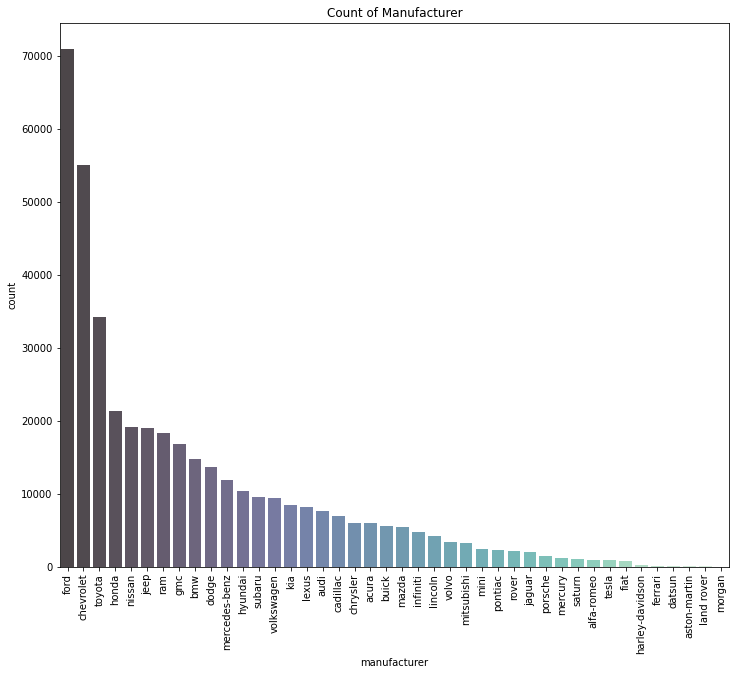

In [12]:
plot_categorical_count(df, 'manufacturer', figsize=(12,10), display=True)

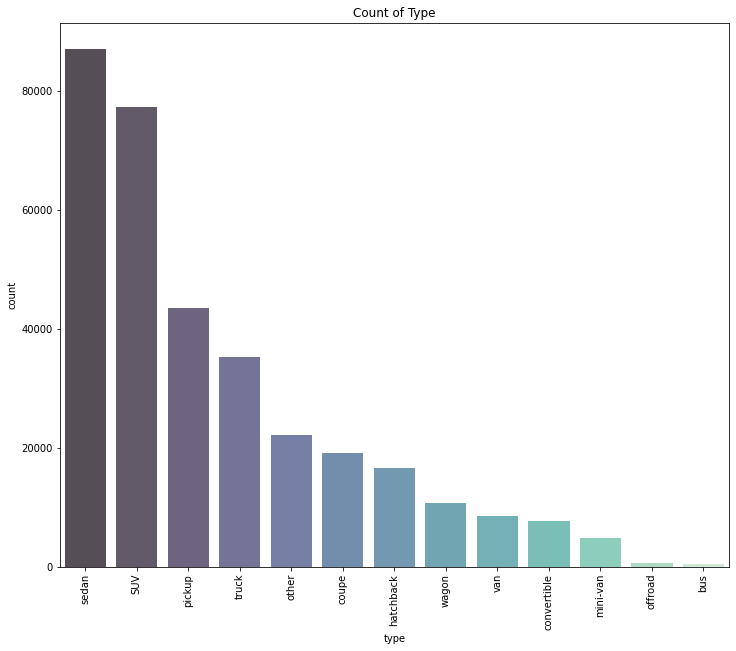

In [13]:
plot_categorical_count(df, 'type', figsize=(12,10), display=True)

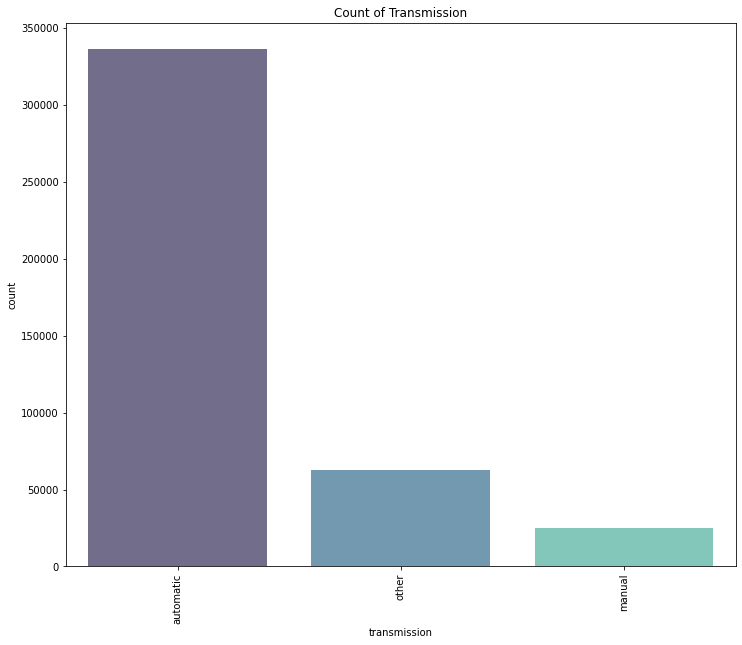

In [14]:
plot_categorical_count(df, 'transmission', figsize=(12,10), display=True)

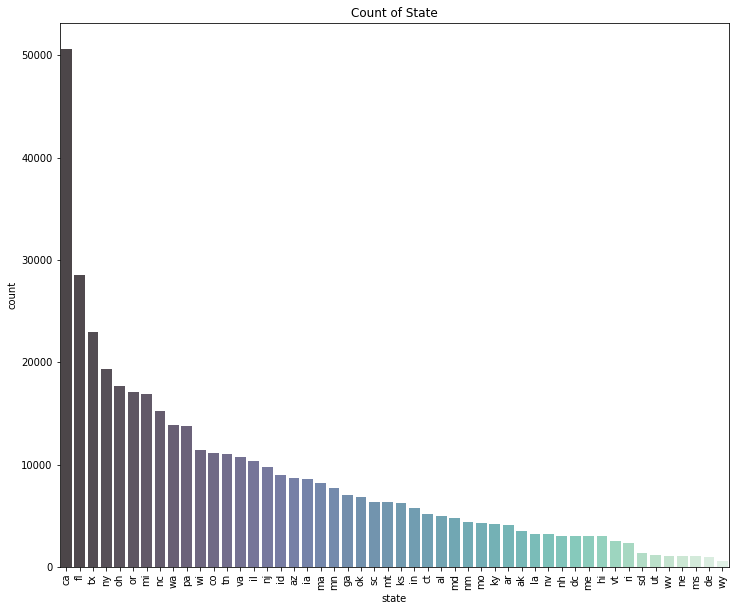

In [16]:
plot_categorical_count(df, 'state', figsize=(12,10), display=True)

#### Continuous Features

In [23]:
# Below are helper functions for plotting numerical/continuous variables in seaborn
def plot_numerical_vs_price(df, col, target, figsize=(12,10), raw_bool=True, display=False):
    """
    Plots a scatter plot for a numerical variable and a target variable
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(x=col, y=target, data=df, palette="mako", alpha=0.75, ax=ax)
    ax.set_title(f'{target.capitalize()} by {col.capitalize()}')
    plt.xticks(rotation=90)
    plt.tight_layout()

    if raw_bool:
        plt.savefig(f'./images/report_images/{target}_by_{col}_raw.png', bbox_inches="tight")
    else:
        plt.savefig(f'./images/report_images/{target}_by_{col}_clean.png', bbox_inches="tight")
    if display:
        plt.show()
    plt.close()


In [25]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col not in ['price', 'id']:
        plot_numerical_vs_price(df, col, 'price')

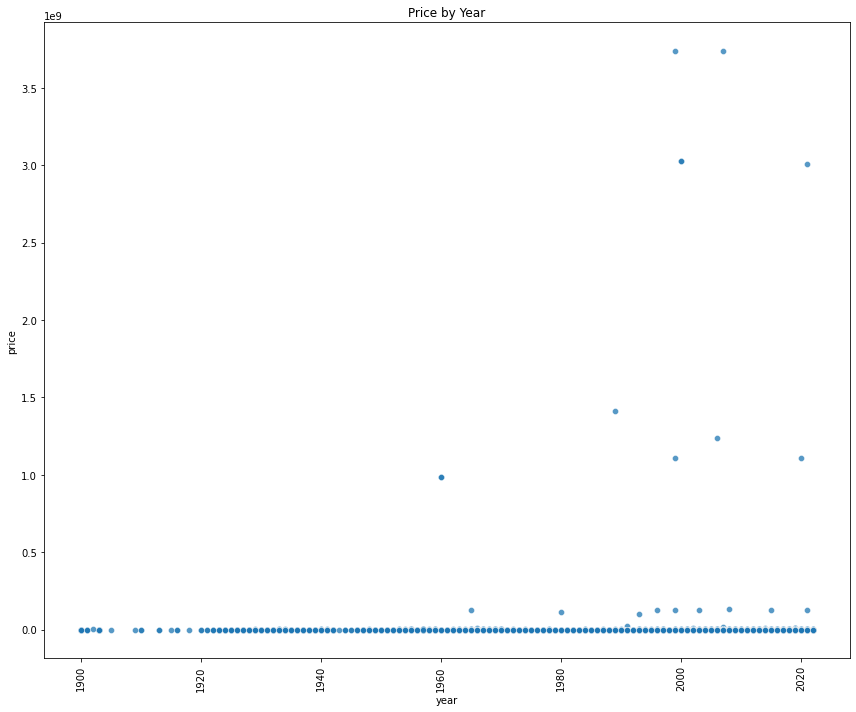

In [27]:
# This chart shows that outliers are present in the data and skewing charts/data
plot_numerical_vs_price(df, 'year', 'price', display=True)

#### EDA Conclusions
Upon initial review, I have a few thoughts on the dataset:
- The dataset seems to be skewed towards sedans and pickups
- The dataset seems to be skewed towards american, and japanese car manufacturers
- The dataset seems to be skewed towards automatic transmission
- The dataset seems to mirror US population in that more populous states have more data with the majority coming from California
- It appears that several outliers are skewing the data / charts. Outlier removal will be required


### Data Quality

After completing the initial exploratory data analysis, some minor data quality isses were discovered. Namely, we need to remove null or NA values as well as complete outlier removal


TODO Need to finish this

In [ ]:
TODO

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

The approach to preparing the data is the following:
- Begin with outlier removal and then remove additional rows/columns that do not contain useful data
- Remove cols with significant null values
- Remove rows with nulls
- Conduct one-hot encoding on categorical columns
- Scale/normalize as needed

#### Outlier Removal

In [4]:
# Outlier Removal using IQR
# I am doing outlier removal on the price, year, and odometer columns

def remove_outliers(df, cols, lower_bound=None, upper_bound=None):
    """
    Removes outliers from a column in a DataFrame using IQR

    Args:
        df (pd.DataFrame): Pandas DataFrame
        col (str): Column name of numerical variable
        lower_bound (float, optional): Lower bound for outliers. Defaults to None.
        upper_bound (float, optional): Upper bound for outliers. Defaults to None.
    
    Returns:
        pd.DataFrame: Pandas DataFrame with outliers removed
    """
    for col in cols:
        if lower_bound is None:
            lower_bound = df[col].quantile(0.02) - (1.5 * (df[col].quantile(0.98) - df[col].quantile(0.02)))
        if upper_bound is None:
            upper_bound = df[col].quantile(0.98) + (1.5 * (df[col].quantile(0.98) - df[col].quantile(0.02)))

        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [5]:
df_processed_1 = remove_outliers(df, ['price', 'year', 'odometer'])
print(f"Original count: {len(df.index)} | Cleaned count: {len(df_processed_1.index)}")

Original count: 426880 | Cleaned count: 331112


In [6]:
plot_numerical_vs_price(df_processed_1, 'year', 'price', raw_bool=False, display=True)

NameError: name 'plot_numerical_vs_price' is not defined

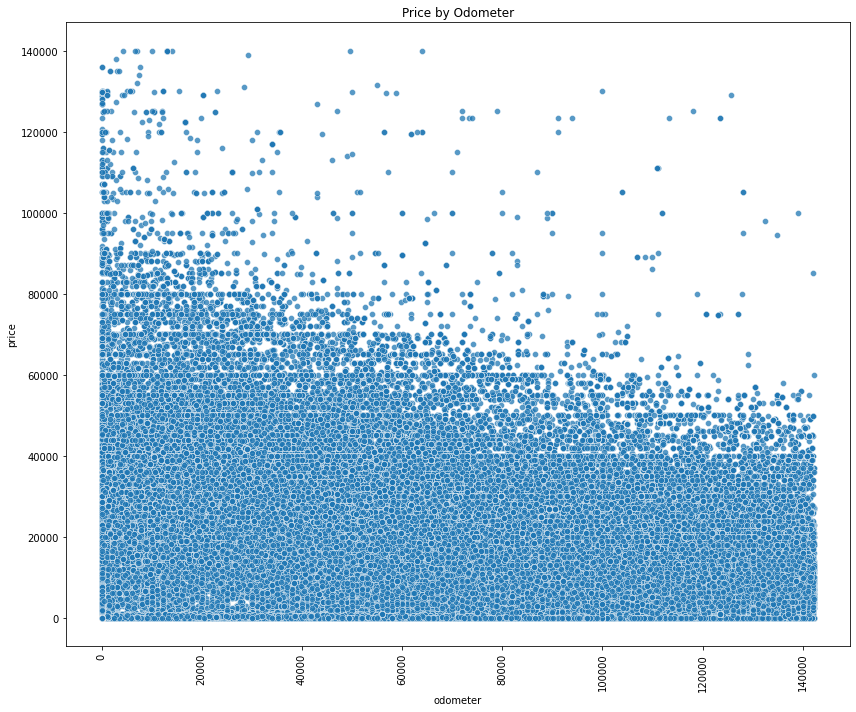

In [60]:
plot_numerical_vs_price(df_processed_1, 'odometer', 'price', raw_bool=False, display=True)

In [61]:
# Replotting charts after outlier removal
for col in df_processed_1.columns:
    if df_processed_1[col].dtype == 'object':
        plot_categorical_count(df_processed_1, col, raw_bool=False)
        plot_categorical_vs_price(df_processed_1, col, 'price', raw_bool=False)

for col in df_processed_1.columns:
    if df_processed_1[col].dtype in ['int64', 'float64'] and col not in ['price', 'id']:
        plot_numerical_vs_price(df_processed_1, col, 'price', raw_bool=False)

After outlier removal, several of the features and plots make more sense. An example of this can be seen below in the paint vs price charts

![Paint Raw](./images/report_images/paint_color_v_price_raw.png "Paint Raw")

![Paint Clean](./images/report_images/paint_color_v_price_clean.png "Paint Clean")

#### Removal of columns and rows 

In [6]:
df_processed_2 = df_processed_1.copy()
df_processed_2 = df_processed_2.drop(columns=['id', 'VIN', 'size', 'model'])
# df_processed_2 = df_processed_2.dropna()  # This removes a lot, maybe revisit
print(f"Original Count: {len(df.index)} | Cleaned Count: {len(df_processed_2.index)}")

Original Count: 426880 | Cleaned Count: 331112


#### One-hot encoding

In [7]:
obj_cols = df_processed_2.select_dtypes(include='object').columns
df_processed_3 = pd.get_dummies(df_processed_2, columns=obj_cols)

#### Polynomial Features

In [8]:
poly = PolynomialFeatures(2)
# Numerical cols
num_cols = df_processed_3.select_dtypes(include=['int64', 'float64']).columns
df_processed_4 = poly.fit_transform(df_processed_3[num_cols])
df_processed_4 = pd.DataFrame(df_processed_4, columns=poly.get_feature_names_out())
df_processed_4

,1,price,year,odometer,price^2,price year,price odometer,year^2,year odometer,odometer^2
0,1.0,33590.0,2014.0,57923.0,1.128288e+09,67650260.0,1.945634e+09,4056196.0,116656922.0,3.355074e+09
1,1.0,22590.0,2010.0,71229.0,5.103081e+08,45405900.0,1.609063e+09,4040100.0,143170290.0,5.073570e+09
2,1.0,39590.0,2020.0,19160.0,1.567368e+09,79971800.0,7.585444e+08,4080400.0,38703200.0,3.671056e+08
3,1.0,30990.0,2017.0,41124.0,9.603801e+08,62506830.0,1.274433e+09,4068289.0,82947108.0,1.691183e+09
4,1.0,15000.0,2013.0,128000.0,2.250000e+08,30195000.0,1.920000e+09,4052169.0,257664000.0,1.638400e+10
...,...,...,...,...,...,...,...,...,...,...
331107,1.0,23590.0,2019.0,32226.0,5.564881e+08,47628210.0,7.602113e+08,4076361.0,65064294.0,1.038515e+09
331108,1.0,30590.0,2020.0,12029.0,9.357481e+08,61791800.0,3.679671e+08,4080400.0,24298580.0,1.446968e+08
331109,1.0,34990.0,2020.0,4174.0,1.224300e+09,70679800.0,1.460483e+08,4080400.0,8431480.0,1.742228e+07
331110,1.0,28990.0,2018.0,30112.0,8.404201e+08,58501820.0,8.729469e+08,4072324.0,60766016.0,9.067325e+08


#### Scale / normalize data

In [9]:
# normalize the data
scaler = StandardScaler()
df_processed_5 = pd.DataFrame(scaler.fit_transform(df_processed_4), columns=df_processed_4.columns)
df_processed_5  

,1,price,year,odometer,price^2,price year,price odometer,year^2,year odometer,odometer^2
0,0.0,0.897586,0.159244,-0.206306,0.492585,0.896466,0.917547,0.158441,-0.204600,-0.473711
1,0.0,0.191208,-0.250028,0.115402,-0.114844,0.188009,0.573950,-0.254820,0.114528,-0.180036
2,0.0,1.282883,0.773151,-1.143503,0.924168,1.288893,-0.294325,0.779874,-1.142892,-0.984328
3,0.0,0.730624,0.466198,-0.612466,0.327543,0.732654,0.232334,0.468926,-0.610349,-0.758055
4,0.0,-0.296193,0.056926,1.487990,-0.395281,-0.296440,0.891378,0.055049,1.492634,1.752814
...,...,...,...,...,...,...,...,...,...,...
331107,0.0,0.255424,0.670833,-0.827598,-0.069453,0.258787,-0.292623,0.676173,-0.825596,-0.869590
331108,0.0,0.704937,0.773151,-1.315914,0.303332,0.709881,-0.693057,0.779874,-1.316273,-1.022335
331109,0.0,0.987488,0.773151,-1.505829,0.586957,0.992953,-0.919608,0.779874,-1.507258,-1.044086
331110,0.0,0.602191,0.568515,-0.878710,0.209632,0.605099,-0.177534,0.572524,-0.877332,-0.892110


### Modeling

In this section, I used multiple regression models followed by cross-validation of these models. Once a model is selected, hyperparameters are tuned through a grid search. Finally coefficients and evaluation metrics are analyzed and discussed. 

- Use of multiple regression models
- Cross-validation of models
- Grid search hyperparameters
- Appropriate interpretation of coefficients in models
- Appropriate interpretation of evaluation metric
- Clear identification of evaluation metric
- Clear rationale for use of given evaluation metric

In [8]:
df_processed_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_processed_2 = df_processed_2.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    df_processed_2.drop(columns=['price']), 
    df_processed_2['price'], 
    test_size=0.2, 
    random_state=43)

In [225]:
def model_fit_summary(model, df, target_col, model_name, display=True):
    # Preprocess column transformer
    categorical_columns = df_processed_2.select_dtypes(include='object').columns
    numerical_columns = df_processed_2.select_dtypes(include=['int64', 'float64']).columns

    numerical_columns = numerical_columns.drop(target_col)

    preprocessor = make_column_transformer(
        (PolynomialFeatures(degree=2, include_bias=False), numerical_columns),
        (OneHotEncoder(drop="if_binary"), categorical_columns),
        (StandardScaler(), numerical_columns),
        verbose_feature_names_out=False,   
    )

    # Pipeline
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    # Train, test split
    X = df.drop(columns=target_col)
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

    # Fit model
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    try:
        print(f"R2: {r2_score(y_test, y_pred)}")
        print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    except:
        pass

    # Print coefficients and intercept if exists
    try:
        print(f"Intercept: {pipe['model'].intercept_}")
        coef = pipe['model'].coef_
        print(f"Coefficients (top 10): {coef[:10]}")
    except:
        pass

    if display:
        _, ax = plt.subplots(figsize=(8,5))
        disp = PredictionErrorDisplay.from_predictions(
            y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.75})
        ax.set_title(f'Model Performance')
        plt.tight_layout()
        plt.savefig(f'./images/report_images/model_{model_name}_performance.png', bbox_inches="tight")
        plt.show()
        plt.close()
    return pipe


In [211]:
# Helper function for model performance
def model_performance(model, model_title, X_test, y_test):
    """
    Plots the model performance using a prediction error plot

    Args:
        model (sklearn model): Trained model
        X_test (pd.DataFrame): Pandas DataFrame of testing data
        y_test (pd.Series): Pandas Series of testing target values
    
    Returns:
        None
    """
    y_pred = model.predict(X_test)
    # drop nas from y_pred if any
    y_pred = y_pred[~np.isnan(y_pred)]

    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R2: {r2_score(y_test, y_pred)}")

    _, ax = plt.subplots(figsize=(8,5))
    disp = PredictionErrorDisplay.from_predictions(
        y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.75})
    ax.set_title(f'Model Performance')
    plt.tight_layout()
    plt.savefig(f'./images/report_images/model_{model_title}_performance.png', bbox_inches="tight")
    plt.show()
    plt.close()



#### Models to Evaluate

In [189]:
# Linear Regression
lr_model = LinearRegression()

# Random Forest Regression
rf_model = RandomForestRegressor()

# Ridge Regression
alphas = np.logspace(-10, 10, 100)  # alpha values to be chosen from by cross-validation
r_model = TransformedTargetRegressor(
    regressor=RidgeCV(alphas=alphas),
    func=np.log1p,
    inverse_func=sp.special.exp10,
)

# Lasso Regression
alphas = np.logspace(-10, 10, 100)  # alpha values to be chosen from by cross-validation
l_model = TransformedTargetRegressor(
    regressor=LassoCV(alphas=alphas, max_iter=100000),
    func=np.log10,
    inverse_func=sp.special.exp10,
)


R2: 0.28212616573458926
RMSE: 11992.490752864143
Intercept: -210022.44562802362
Coefficients (top 10): [ 1.50087612e-05 -3.85767670e-04  6.01343966e-02 -1.37529283e-04
  8.03983636e-07  6.12717309e-09  6.98029284e-11 -7.41357007e-09
  1.32748895e-08 -6.67916432e-10]


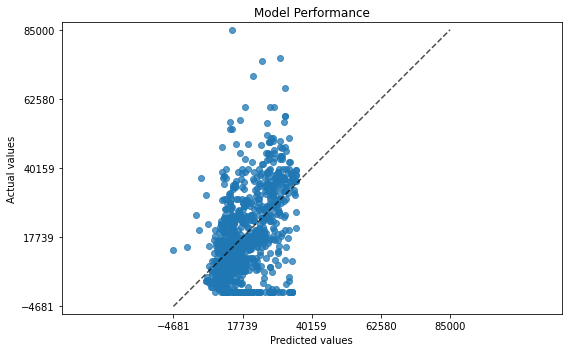

In [219]:
lr_model = model_fit_summary(LinearRegression(), df_processed_2, 'price', 'LinearRegression')

R2: 0.8202920319372078
RMSE: 6000.245184771012


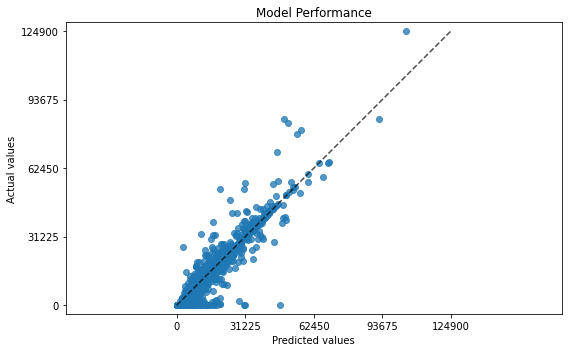

In [220]:
rf_model = model_fit_summary(RandomForestRegressor(), df_processed_2, 'price', 'RandomForestRegressor')

In [226]:
alphas = np.logspace(0.01, 10, 100)  # alpha values to be chosen from by cross-validation

r_model = TransformedTargetRegressor(
    regressor=RidgeCV(alphas=alphas),
    func=np.log1p,
    inverse_func=np.exp,
)

r_model_pipe = model_fit_summary(r_model, df_processed_2, 'price', 'RidgeCV Model')

/Users/nathanmeek/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/Users/nathanmeek/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/compose/_target.py:190: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(
/Users/nathanmeek/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:310: RuntimeWarning: overflow encountered in exp
  return func(X, **(kw_args if kw_args else {}))
/Users/nathanmeek/opt/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


ValueError: Axis limits cannot be NaN or Inf

Error in callback <function _draw_all_if_interactive at 0x7f78c0f0faf0> (for post_execute):


ValueError: Axis limits cannot be NaN or Inf

ValueError: cannot convert float NaN to integer

In [ ]:
alphas = np.logspace(-10, 10, 100)  # alpha values to be chosen from by cross-validation

l_model = TransformedTargetRegressor(
    regressor=LassoCV(alphas=alphas),
    func=np.log10,
    inverse_func=sp.special.exp10,
)

model_fit_summary(l_model, df_processed_2, 'price', 'LassoCV Model')

In [ ]:
# Lazy Predict
from lazypredict.Supervised import LazyRegressor

X = df_processed_5.drop(columns=['price'])
y = df_processed_5['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.